In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(1000,centers=2,random_state=42)

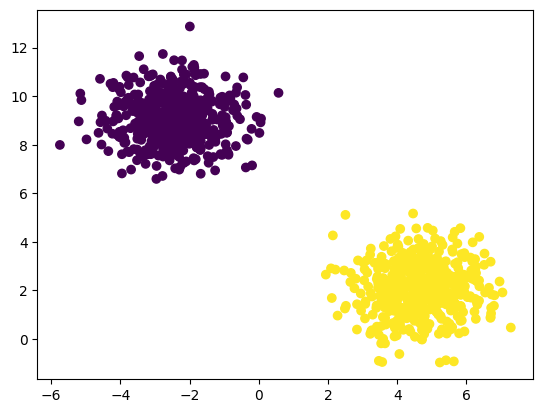

In [3]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [4]:
y[y == 0] = -1

In [5]:
np.unique(y)

array([-1,  1])

In [6]:
class SVM:
    def __init__(self,C = 1.0,lr = 0.01,epochs = 100):
        self.C = C
        self.lr = lr
        self.epochs = epochs

    def fit(self,X,y):
        self.w,self.w0 = self.gradientDescent(X,y,self.lr,self.epochs)
        
    def hypothesis(self,X,w,w0):
        return w@X.T + w0

    def functional_margin(self,X,w,w0,y):
        return y*(self.hypothesis(X,w,w0))

    def hinge_loss(self,X,w,w0,y):
        ti = self.functional_margin(X,w,w0,y)
        er = 1-ti
        er[er < 0] = 0
        return 0.5*(w@w) + self.C*np.sum(er)

    def gradientDescent(self,X,y,lr=0.01,epochs = 100):
        w0 = 0
        w = np.ones(shape=(X.shape[1],))
        self.loss_e = []
    
        for e in range(epochs):
            self.loss_e.append(self.hinge_loss(X,w,w0,y))
            
            ti = self.functional_margin(X,w,w0,y)
            ti[ti < 1] = -1
            ti[ti >= 1] = 0
            
            grad = w + self.C*((ti*y@X))
            
            w = w - self.lr*grad
            w0 = w0 - self.lr*(self.C*np.sum(ti*y))
            
        return w,w0

    def predict(self,X):
        ypred = self.hypothesis(X,self.w,self.w0)
        ypred[ypred >= 0] = 1
        ypred[ypred < 0] = -1
        return ypred

In [37]:
clf = SVM(epochs=2000,C = 1)
clf.fit(X,y)

In [38]:
ypred = clf.predict(X)

In [39]:
np.mean(ypred == y)

1.0

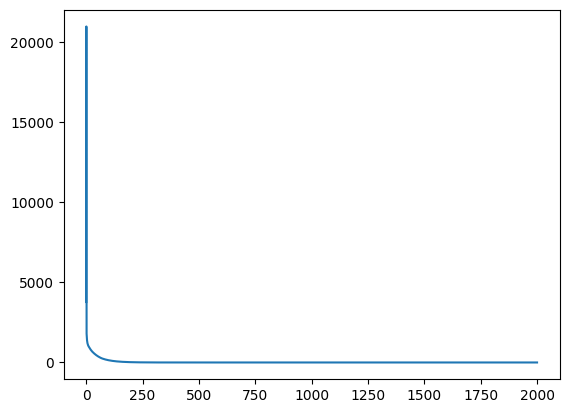

In [40]:
plt.plot(clf.loss_e)
plt.show()

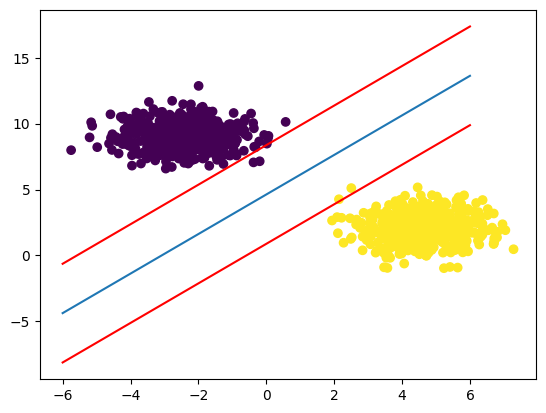

In [41]:
x1 = np.linspace(-6,6,100)
x2 = -(clf.w[0]*x1+clf.w0)/clf.w[1]
plt.plot(x1,x2)

s1x2 = (1/np.linalg.norm(clf.w,ord=2)-(clf.w[0]*x1+clf.w0))/clf.w[1]
plt.plot(x1,s1x2,c='r')

s1x2 = (-1/np.linalg.norm(clf.w,ord=2)-(clf.w[0]*x1+clf.w0))/clf.w[1]
plt.plot(x1,s1x2,c='r')

plt.scatter(X[:,0],X[:,1],c = y)
plt.show()